In [1]:
#import the required modules

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams["figure.figsize"] = (14 ,8)    #adjusts the configuration of the plots that we will use

In [2]:
# importing the dataset
df_movies = pd.read_csv("movies.csv")

# shows the first 5 rows of the dataset
df_movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# to check the number of rows and columns in the dataset
df_movies.shape

(7668, 15)

In [4]:
# dropping the columns that we doesn't need

df_movies = df_movies.drop(["released", "writer"], axis= "columns")

In [5]:
# to check if there's a missing data


for col in df_movies.columns:
  missing = np.mean(df_movies[col].isnull())
  print("{0} - {1}%".format(col, missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [6]:
# finding the missing values

rating_missing = df_movies["rating"].isna()
score_missing = df_movies["score"].isna()
votes_missing = df_movies["votes"].isna()
star_missing = df_movies["star"].isna()
country_missing = df_movies["country"].isna()
budget_missing = df_movies["budget"].isna()
gross_missing = df_movies["gross"].isna()
company_missing = df_movies["company"].isna()
runtime_missing = df_movies["runtime"].isna()

In [7]:
#removing the missing value rows

df_movies = df_movies.loc[-budget_missing , :]
df_movies = df_movies.loc[-gross_missing , :]
df_movies = df_movies.loc[-rating_missing , :]
df_movies = df_movies.loc[-score_missing , :]
df_movies = df_movies.loc[-votes_missing , :]
df_movies = df_movies.loc[-star_missing , :]
df_movies = df_movies.loc[-country_missing , :]
df_movies = df_movies.loc[-company_missing , :]
df_movies = df_movies.loc[-runtime_missing , :]

In [8]:
# to check again whether all the missing values are removed or not

for col in df_movies.columns:
  missing = np.mean(df_movies[col].isnull())
  print("{0} - {1}%".format(col, missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [9]:
# to check the data types in the dataset

df_movies.dtypes

name         object
rating       object
genre        object
year          int64
score       float64
votes       float64
director     object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [10]:
# making the dataset in the descending order with it's gross value

df_movies = df_movies.sort_values(by= ["gross"], inplace= False, ascending = False);

In [11]:
# now to look at the numerical correlation

df_movies.corr()    # high correlation between gross and budget

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


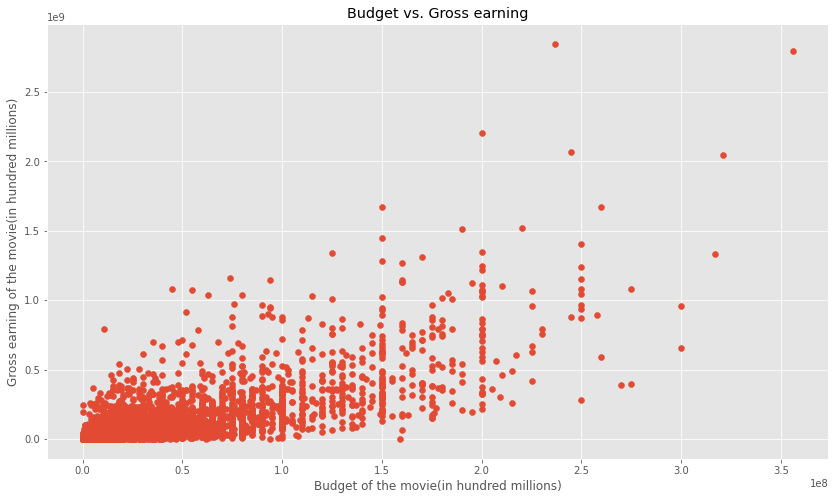

In [12]:
# scatter plot of budget and gross

plt.scatter(x= df_movies["budget"], y= df_movies["gross"])
plt.title("Budget vs. Gross earning")
plt.xlabel("Budget of the movie(in hundred millions)")
plt.ylabel("Gross earning of the movie(in hundred millions)");

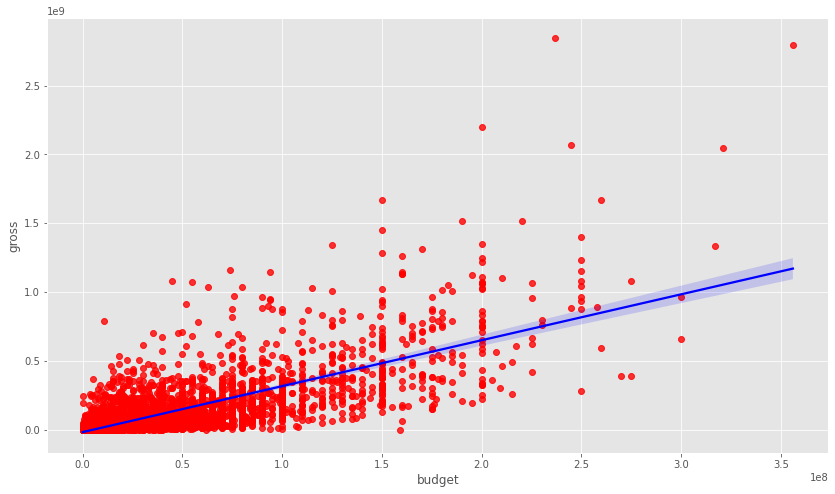

In [13]:
sns.regplot(x= "budget", y= "gross", data= df_movies, scatter_kws= {"color" : "red"}, line_kws= {"color" : "blue"});

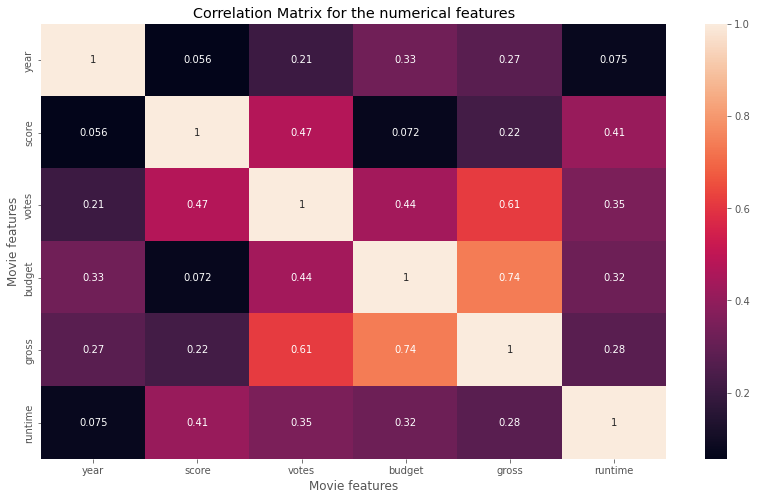

In [14]:
# to visually represents the correlation

correlation_matrix = df_movies.corr()
sns.heatmap(correlation_matrix, annot = True);    # Dark colour represents low correlation whereas, light color represents high correlation

plt.title("Correlation Matrix for the numerical features")
plt.xlabel("Movie features")
plt.ylabel("Movie features");

In [15]:
# copying the original dataset

df_new = df_movies.copy()

In [16]:
# changing the object into category

for col_name in df_new.columns:
  if df_new[col_name].dtype == "object":
    df_new[col_name] = df_new[col_name].astype("category")
    df_new[col_name] = df_new[col_name].cat.codes

In [17]:
df_new.head()

,name,rating,genre,year,score,votes,director,star,country,budget,gross,company,runtime
5445,386,5,0,2009,7.8,1100000.0,785,1534,47,237000000.0,2.847246e+09,1382,162.0
7445,388,5,0,2019,8.4,903000.0,105,1470,47,356000000.0,2.797501e+09,983,181.0
3045,4909,5,6,1997,7.8,1100000.0,785,1073,47,200000000.0,2.201647e+09,1382,194.0
6663,3643,5,0,2015,7.8,876000.0,768,356,47,245000000.0,2.069522e+09,945,138.0
7244,389,5,0,2018,8.4,897000.0,105,1470,47,321000000.0,2.048360e+09,983,149.0


In [18]:
correlation_matrix_n = df_new.corr()
correlation_matrix_n

,name,rating,genre,year,score,votes,director,star,country,budget,gross,company,runtime
name,1.000000,-0.029234,0.010996,0.025542,0.014450,0.012615,0.015246,-0.006882,-0.025490,0.023392,0.005639,0.021697,0.010850
rating,-0.029234,1.000000,0.147796,0.019499,0.065983,0.006031,0.014656,0.009196,0.008230,-0.203946,-0.181906,-0.092357,0.140792
genre,0.010996,0.147796,1.000000,-0.073167,0.035106,-0.135990,-0.008553,0.003341,-0.009164,-0.368523,-0.244101,-0.071334,-0.059237
year,0.025542,0.019499,-0.073167,1.000000,0.056386,0.206021,-0.038354,-0.032157,-0.066748,0.327722,0.274321,-0.014333,0.075077
score,0.014450,0.065983,0.035106,0.056386,1.000000,0.474256,0.005413,0.007296,-0.043051,0.072001,0.222556,0.020656,0.414068
votes,0.012615,0.006031,-0.135990,0.206021,0.474256,1.000000,-0.010376,-0.017638,0.041551,0.439675,0.614751,0.118470,0.352303
director,0.015246,0.014656,-0.008553,-0.038354,0.005413,-0.010376,1.000000,0.036593,0.011133,-0.009662,-0.029560,-0.008223,0.017433
star,-0.006882,0.009196,0.003341,-0.032157,0.007296,-0.017638,0.036593,1.000000,-0.009990,-0.021473,-0.000004,0.014082,0.010108
country,-0.025490,0.008230,-0.009164,-0.066748,-0.043051,0.041551,0.011133,-0.009990,1.000000,0.052977,0.060078,0.048569,-0.034477
budget,0.023392,-0.203946,-0.368523,0.327722,0.072001,0.439675,-0.009662,-0.021473,0.052977,1.000000,0.740247,0.170235,0.318695


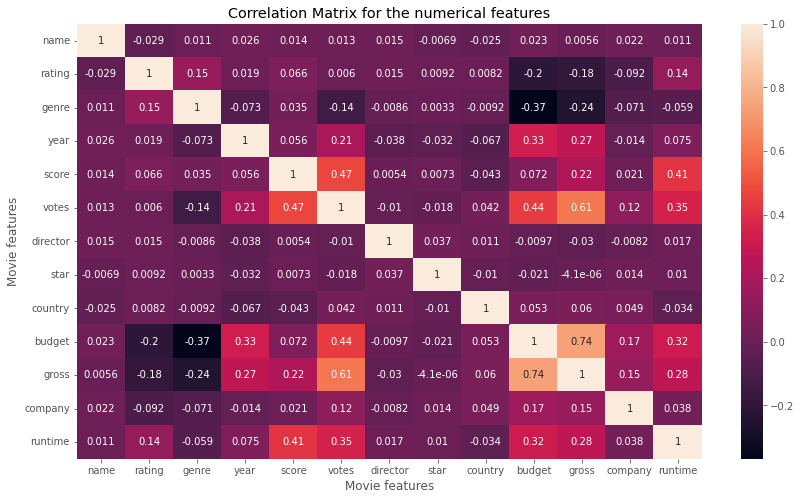

In [19]:
sns.heatmap(correlation_matrix_n, annot = True);    # Dark colour represents low correlation whereas, light color represents high correlation

plt.title("Correlation Matrix for the numerical features")
plt.xlabel("Movie features")
plt.ylabel("Movie features");

# **Gross and Budget & Votes and Gross has the highest correlation**

In [20]:
corr_pairs = correlation_matrix_n.unstack().sort_values(ascending = False)
corr_pairs.head(20)

name      name        1.000000
rating    rating      1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
votes     votes       1.000000
score     score       1.000000
year      year        1.000000
genre     genre       1.000000
director  director    1.000000
runtime   runtime     1.000000
gross     budget      0.740247
budget    gross       0.740247
votes     gross       0.614751
gross     votes       0.614751
score     votes       0.474256
votes     score       0.474256
          budget      0.439675
dtype: float64